<a href="https://www.kaggle.com/code/pankajkumar2002/twitter-sentiment-doc2vec?scriptVersionId=153319935" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <h1 style='background:red;padding-top:15px; border:2px solid white;'> <center> Sentiment Analysis </center> </h1>

![](https://miro.medium.com/max/1400/1*lAu0XNZ0LWqQQAxZY5jypA.jpeg)

# <h1 style='background:red;padding-top:5px; border:2px solid white;'> <center> Table of Contents  </center> </h1>

<div style='font-size:16px;'>
    <ul>
        <li> Introduction </li>
        <ol style='color:red;'>
            <li> Word2Vec </li>
            <li> Doc2Vec </li>
        </ol>
        <li> Preprocessing </li>
        <li> Research Paper Approaches </li>
        <ol style='color:red;'>
            <li> Standard text features (unigrams) of content </li>
            <li> Doc2Vec features </li>
            <li> Domain based Features</li>
        </ol>
        <li> Classification Models</li>
    </ul>
</div>

# <h1 style='background:red;padding-top:5px; border:2px solid white;'> <center> Introduction </center> </h1>

Natural language processing (NLP) refers to the branch of computer science and more specifically, the branch of artificial intelligence or AI concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

NLP combines computational linguistics rule-based modeling of human language with statistical, machine learning, and deep learning models. Together, these technologies enable computers to process human language in the form of text or voice data and to understand its full meaning, complete with the speaker or writer’s intent and sentiment.

Since Machine can only understand numbers regardless of whatever input data we have. This causes text data to be transformed to numbers in more efficient way.There are many old and new technique for this. Unlike In normal machine leraning task we use to to One-hot encoding of categorical data but it's not possible in case of NLP because a vast number of variety of word in corpus would cause to create million features which is not practical.

Processing text to numbers is called Word Embedding. Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc. There are certain ways by which word Embedding possible.


<div style='font-size:16px;'> 
    
> **Word2Vec** : Word2Vec is a method to construct such an embedding. It can be obtained using two methods (both involving Neural Networks): Skip Gram and Common Bag Of Words (CBOW). CBOW Model method takes the context of each word as the input and tries to predict the word corresponding to the context. While Skip Gram model is just revere of CBOW it take the target word and tries to predict all the context words.

> **Doc2Vec** : Doc2Vec model, as opposite to Word2Vec model, is used to create a vectorised representation of a group of words taken collectively as a single unit. It doesn’t only give the simple average of the words in the sentence. In the doc2vec architecture, the corresponding algorithms are “distributed memory” (DM) and “distributed bag of words” (DBOW) which are anolgous to CBOW and skip Grap.



</div>

In [1]:
import re
import string
import pandas as pd
import numpy as np

import warnings
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook

import nltk
import gensim
from wordcloud import WordCloud
from nltk.corpus import stopwords
import gensim.downloader as api

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold

In [2]:
warnings.filterwarnings("ignore")
tqdm_notebook.pandas()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
raw_dataset = pd.read_csv('../input/nlp-getting-started/train.csv')
raw_dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# <h1 style='background:red;padding-top:5px; border:2px solid white;'> <center> Preprocessing </center> </h1>

The following histogram show the distribution of positive or Negative class of twitter dataset, Histogram shows that we have negative class more as comparison to positive one.Since our Dataset has 5 columns, first column need to be discard i.e. ID columns. the content of location and keyword are added to text feature and both two features are deleted respectively. Remove Punctuation function is being defined for removing punctuation. 



In [4]:
fig = px.histogram(raw_dataset, x='target', nbins=10)
fig.update_layout(template='plotly_dark', title='Binary Classification Counts', width=700, xaxis=dict(dtick=1))
fig.show()

In [5]:
fig = px.histogram(y=raw_dataset['location'].value_counts()[:20], x=raw_dataset['location'].value_counts()[:20].index, color_discrete_sequence=["red"])
fig.update_layout(template='plotly_dark', xaxis_title='Country', yaxis_title='Count', width=1000)
fig.show()

In [6]:
fig = px.histogram(y=raw_dataset['keyword'].value_counts()[:20], x=raw_dataset['keyword'].value_counts()[:20].index, color_discrete_sequence=["orange"])
fig.update_layout(template='plotly_dark', xaxis_title='Keyword', yaxis_title='Count', width=1000)
fig.show()

In [7]:
fig = px.pie(raw_dataset, names='target', title ='Pie chart for sentiments of tweets')
fig.update_layout(template='plotly_dark', width=600, height=400)
fig.show()

In [8]:
keyword_dataset = raw_dataset.groupby('location')
keyword_dataset.first()

,id,keyword,text,target
location,,,,
,9703,tornado,Maybe that's what happens when a tornado meets...,1
Glasgow,10822,wrecked,@Caitsroberts see U the night wee bArra to get...,0
"Melbourne, Australia",2579,crash,@DestinyTheGame @Bungie @PlayStation Getting k...,0
News,3955,devastation,70 Years After Atomic Bombs Japan Still Strugg...,1
å_,5338,fire,WCW @catsandsyrup THA BITCH IS FIRE,0
...,...,...,...,...
å_: ?? ÌÑ ? : ?,5918,harm,someone just reblogged a picture of self harm ...,0
å_å_Los Mina Cityã¢,9788,trapped,Hollywood Movie About Trapped Miners Released ...,0
å¡å¡Midwest Û¢Û¢,10023,twister,@sarahmcpants @JustJon I'll give him a titty t...,0


In [9]:
keyword_dataset = raw_dataset.groupby('keyword')
keyword_dataset.first()

,id,location,text,target
keyword,,,,
ablaze,48,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
accident,96,CLVLND,'I can't have kids cuz I got in a bicycle acci...,0
aftershock,146,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0
airplane%20accident,196,"19.600858, -99.047821",Experts in France begin examining airplane deb...,1
ambulance,246,Jackson,Early wake up call from my sister begging me t...,1
...,...,...,...,...
wounded,10585,"Maracay y Nirgua, Venezuela",Gunmen kill four in El Salvador bus attack: Su...,1
wounds,10636,Charlotte,Gunshot wound #9 is in the bicep. The only one...,1
wreck,10685,moss chamber b,@Squeaver just hangin out in star buck watchin...,0


In [10]:
def filter_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\x89\S+', '', text)
    text = re.sub(r'\n\S+', '', text)
    text = re.sub(r'[0-9]', '', text)
    return text

def PreProcessing(df):
    dataset = df.copy()
    dataset = dataset.fillna('')
    dataset['text'] = dataset['text'] + dataset['keyword']
    dataset = dataset.iloc[:, 3:]
    dataset['text'] = dataset['text'].progress_apply(lambda x:filter_text(x))
    return dataset

def remove_punctuation(text):
    if ( type(text) == float ):
        return text
    ans = ''
    for i in text:
        if i not in string.punctuation:
            ans +=i
    return ans

In [11]:
dataset = PreProcessing(raw_dataset)
dataset['text'] = dataset['text'].progress_apply(lambda x:remove_punctuation(x))

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

# <h1 style='background:red;padding-top:5px; border:2px solid white;'> <center> Research Paper Approaches </center> </h1>

Generate unigrams functions is defined for extraction for n-gram word but specifally in this we are using unigram according to reserach paper. In the next step we are tokenizing the word. The Document is being converted to tagged Document with respective labels.

The Doc2Vec function is build the vocabulory for each documents in tagged document iteratively and performaing training. Vector for learning function is being define for converting TaggedDocument into input features and Labels.

![](https://1.bp.blogspot.com/-HT5PULmNGBM/XZ7v3xIXUcI/AAAAAAAAB3E/3eGAgh41ajg3c6Y_rIz9BSIcefeVdCfmwCLcBGAsYHQ/s1600/image002.png)

In [12]:
def generate_unigram(text, n_gram=1):
    words = [ word for word in text.split(' ') if word not in set( stopwords.words('english')) ]
    temp = zip(* [words[i:] for i in range(0, n_gram)] )
    ans = [' '.join(ngram) for ngram in temp]
    result = ''
    for word in ans:
        result = result + word + ' '
        
    return result[:-2]

In [13]:
dataset['text'] = dataset['text'].progress_apply(lambda x:generate_unigram(x))
dataset.head()

  0%|          | 0/7613 [00:00<?, ?it/s]

,text,target
0,deeds reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canad,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders ca...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [14]:
disaster_tweets_text = dataset.query("target==1").text
concat_disaster_tweets_text = disaster_tweets_text.str.cat(sep=" ")

non_disaster_tweets_text = dataset.query("target==0").text
concat_non_disaster_tweets_text = non_disaster_tweets_text.str.cat(sep=" ")

(-0.5, 399.5, 199.5, -0.5)

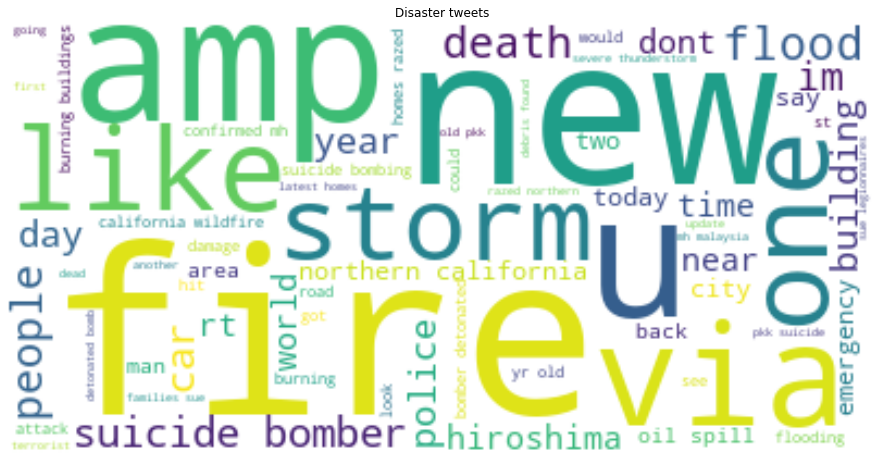

In [15]:
word_cloud = WordCloud(stopwords=stopwords.words('english'), background_color='white' ,max_words=100).generate(concat_disaster_tweets_text)
plt.figure(figsize=(20, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Disaster tweets')
plt.axis('off')

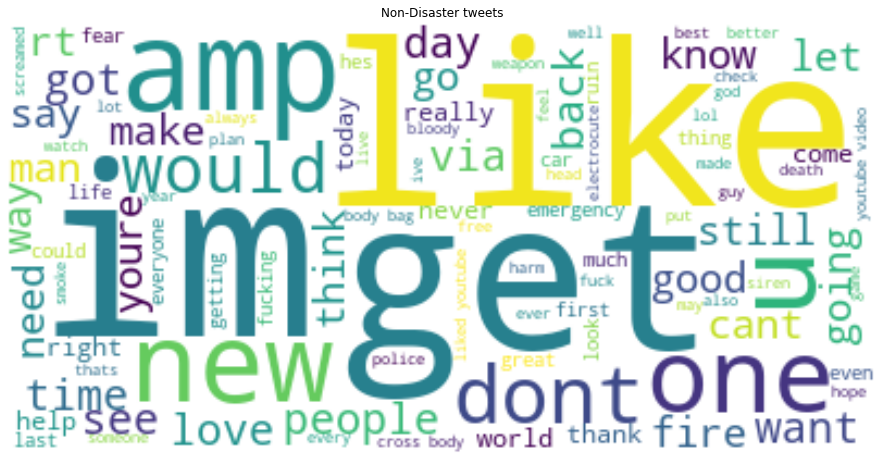

In [16]:
word_cloud = WordCloud(stopwords=stopwords.words('english'), background_color='white', max_words=100).generate(concat_non_disaster_tweets_text)
plt.figure(figsize=(20, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Non-Disaster tweets')
plt.axis('off')
plt.show()

In [17]:
def tokenize_text(text):
    token_list = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if ( len (word ) < 2 ):
                continue
            token_list.append(word)
    return token_list

In [18]:
train_tagged = dataset.progress_apply(lambda r:gensim.models.doc2vec.TaggedDocument(tokenize_text(r['text']), [r['target']]), axis=1)

  0%|          | 0/7613 [00:00<?, ?it/s]

In [19]:
def doc_2_vec_model(train_set):
    train_set = []
    for tag in train_tagged:
        train_set.append(tag)

    dbow_model = gensim.models.doc2vec.Doc2Vec(vector_size=200, min_count=2, epochs=30)
    dbow_model.build_vocab([x for x in train_set])
    dbow_model.train(train_set, total_examples=len(train_set), epochs=50)
    return train_set, dbow_model

def vector_for_learning(model, input_docs):
    sents = input_docs
    feature_vectors, target = zip(*[(model.infer_vector(doc.words, steps=20), doc.tags[0]) for doc in tqdm(sents) ])
    return np.array(feature_vectors), np.array(target)

In [20]:
train_ds, dbow_model = doc_2_vec_model(train_tagged)

In [21]:
x, y = vector_for_learning(dbow_model, train_ds)

100%|██████████| 7613/7613 [00:21<00:00, 355.91it/s]


# <h1 style='background:red;padding-top:5px; border:2px solid white;'> <center> Classification Models </center> </h1>

create_models Function define a number of models for find the cross validation score to get the optimum model for this task. Similarly, models_accuracy function is being defined for hyperparameter tuning with the k-fold cross validation for all models and the models accuracy is displayed. The hyperparameters are initialized into the dictionary in a list.



In [22]:
def create_models():
    lr_model = LogisticRegression()
    nb_model = GaussianNB()
    sv_model = SVC()
    ab_model = AdaBoostClassifier()

    mdls = [lr_model, nb_model, sv_model, ab_model]
    mdls_names = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'AdaBosst Classifier']
    return mdls, mdls_names

def models_accuracy(models, models_name, X, Y):
    scores = {}
    
    grid = [
        
        dict(
                solver = ['newton-cg', 'lbfgs', 'liblinear'],
                penalty = ['l2'],
                C = [100, 10, 1.0, 0.1, 0.01]),
        
        dict (  var_smoothing = list(np.logspace(0, -9, num=100)) ),
        
        dict (
                kernel = ['poly', 'rbf', 'sigmoid'],
                C = [50, 10, 1.0, 0.1, 0.01],
                gamma = ['scale']),
        
        dict (  n_estimators = [10, 50, 100]   ) ]
    
    
    for i, model in tqdm(enumerate(models)):
        rand_search = RandomizedSearchCV( model, grid[i],cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) )
        search = rand_search.fit(X, Y)
        scores[models_name[i]] = search
        
    return scores

In [23]:
models, models_name_ = create_models()
_hyper_prm_result = models_accuracy(models, models_name_, x, y)

4it [37:48, 567.21s/it]


In [24]:
for key in _hyper_prm_result.keys():
    print('Accuracy of {} is {}'.format(key, _hyper_prm_result[key].best_score_))

Accuracy of Logistic Regression is 0.8135639664621422
Accuracy of Naive Bayes is 0.7397414186564393
Accuracy of Support Vector Machine is 0.84154075024459
Accuracy of AdaBosst Classifier is 0.7972753652179813


In [25]:
hyper_score = 0
best_params = None
model = None
for i, key in enumerate(_hyper_prm_result.keys()):
    tmp_score = _hyper_prm_result[key].best_score_
    if ( tmp_score > hyper_score ):
        hyper_score = tmp_score
        best_params = _hyper_prm_result[key].best_params_
        model = models[i]

<p style='color:#FF9600; font-size:18px;'> The Best models and the the hyperparameters are found as shown and accordingly, the final model is being selected with suitable hyperparameters. Next, Splitting up the data into training and validation set to find the metrics as follows. The final model is being trained on the whole dataset to avoid overfitting and to do prediction on the unlabeled test dataset. </p>

In [26]:
print('Best Scores : {}'.format(hyper_score))
print('Best Hyperparameters : {}'.format(best_params))
print('Best Model : {}'.format(model))

Best Scores : 0.84154075024459
Best Hyperparameters : {'kernel': 'rbf', 'gamma': 'scale', 'C': 50}
Best Model : SVC()


In [27]:
model = SVC(kernel='rbf', gamma='scale', C=50)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [29]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('roc_auc : {}'.format(roc_auc_score(y_test, y_pred)))
print('accuracy score : {}'.format(accuracy_score(y_test, y_pred)))
print('presion score : {}'.format(precision_score(y_test, y_pred)))
print('recall score : {}'.format(recall_score(y_test, y_pred)))
print('f1 score : {}'.format(f1_score(y_test, y_pred)))

roc_auc : 0.8366801389886283
accuracy score : 0.8436952714535902
presion score : 0.8369565217391305
recall score : 0.7881269191402251
f1 score : 0.8118081180811808


In [30]:
model.fit(x, y)

SVC(C=50)

# <h1 style='background:red;padding-top:5px; border:2px solid white;'> <center> Test Data </center> </h1>

In [31]:
test_data = pd.read_csv('../input/nlp-getting-started/test.csv')
id_col = test_data['id'].copy()
test_data = PreProcessing(test_data)
test_data['text'] = test_data['text'].progress_apply(lambda x:remove_punctuation(x))
test_data['text'] = test_data['text'].progress_apply(lambda x:generate_unigram(x))

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

In [32]:
test_tagged = test_data.progress_apply(lambda r:gensim.models.doc2vec.TaggedDocument(tokenize_text(r['text']), 0), axis=1)

  0%|          | 0/3263 [00:00<?, ?it/s]

In [33]:
def vector_for_testing(sents, model):
    test = [ model.infer_vector(doc.words, steps=20) for doc in tqdm(sents) ]
    return test

In [34]:
test_ds = vector_for_testing(test_tagged, dbow_model)
test_ds = np.array(test_ds)

100%|██████████| 3263/3263 [00:08<00:00, 379.92it/s]


In [35]:
y_test = model.predict(test_ds)
df = { 'id':id_col, 'target':y_test }
df = pd.DataFrame(df)
df.to_csv('submission.csv', index=False)

> Reserach Paper Title : Mining user-generated content in an online smoking cessation community to identify smoking status: A machine learning approach

> Note : Since we do not have proper dataset of Smoking in context of NLP, Therefore Twitter dataset is used.

# <h2 style='background:red;padding-top:5px; border:2px solid white;'> <center> Thank You! feel free to Comment. </center> </h2>